# The Sparks Foundation  #GRIPMAR21
 
# TASK 6 Classification using Decision Tree Algorithm

# Presented by - Ishan Arora

# Loading important libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading Dataset

In [42]:
df = pd.read_csv(r'C:\Users\user\Desktop\Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [43]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking for data types, Missing values If any

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
l_encoder = LabelEncoder()
df['Species'] = l_encoder.fit_transform(df['Species'])

## Checking for Imbalance class in Dataset

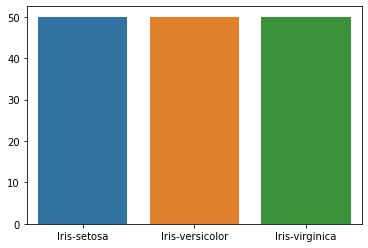

In [10]:
sns.barplot(x=df.Species.value_counts().keys(),y=[50,50,50])
plt.xticks(ticks=[0,1,2],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.show()

## Checking for any Outliers using Box plot

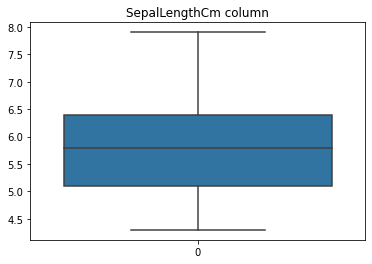

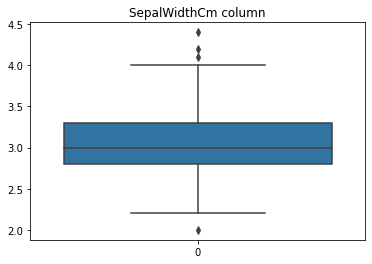

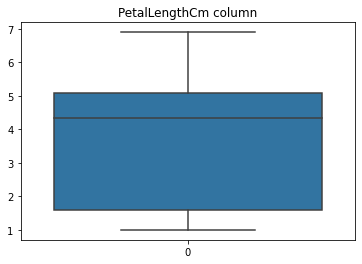

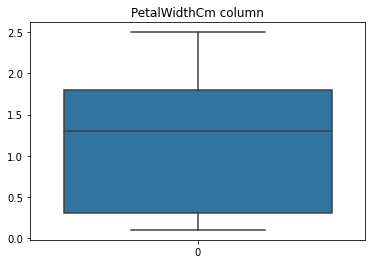

In [11]:
for c in df.columns:
    if c=='Id' or c == 'Species':
        continue
    sns.boxplot(data=df.loc[:,c])
    plt.title(c+' column')
    plt.show()

In [12]:
df.SepalWidthCm.describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

## Using IQR to remove outliers

In [13]:
Q1 = df.SepalWidthCm.describe()['25%']
Q3 = df.SepalWidthCm.describe()['75%']
IQR = Q3-Q1
lb = Q1 - 1.5*IQR
up = Q3  + 1.5*IQR
d = df.loc[(df.SepalWidthCm > lb) & (df.SepalWidthCm < up)]

<AxesSubplot:>

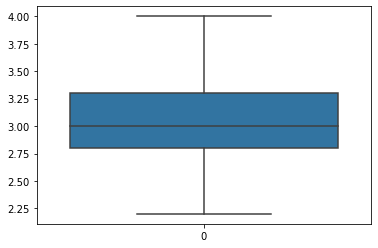

In [14]:
sns.boxplot(data=d.SepalWidthCm)

# Univariate analysis

In [16]:
df_setosa = d.loc[d['Species']==0]
df_versicolor = d.loc[d['Species']==1]
df_virginica = d.loc[d['Species']==2]

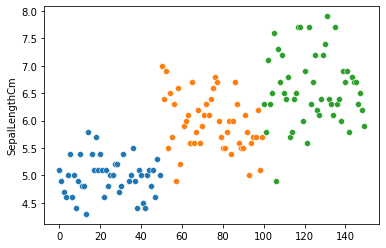

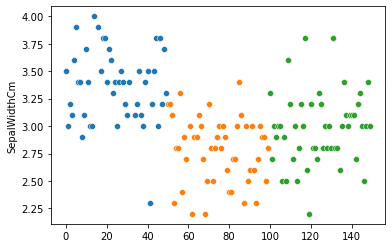

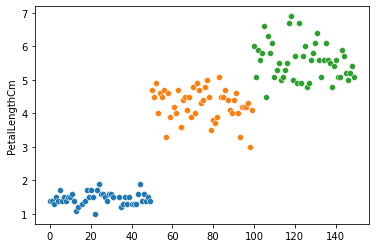

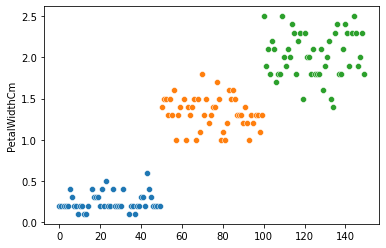

In [17]:
for c in d.columns:
    if c == 'Id' or c == 'Species':
        continue
    sns.scatterplot(data=df_setosa[c])
    sns.scatterplot(data=df_versicolor[c])
    sns.scatterplot(data=df_virginica[c])
    plt.show()

## Multivariate Analysis

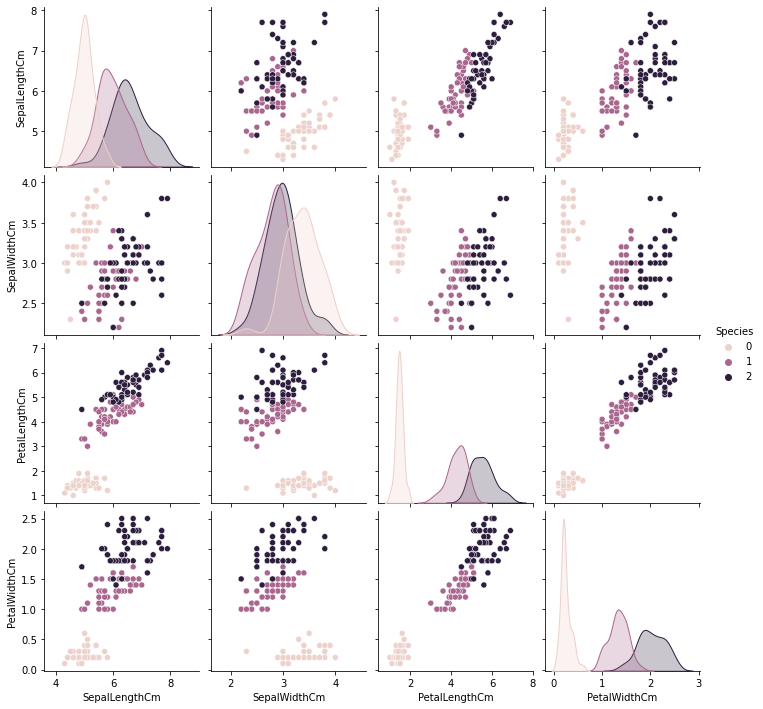

In [18]:
sns.pairplot(data=d.iloc[:,1:] ,hue='Species')
plt.show()

## checking coorelation between each features

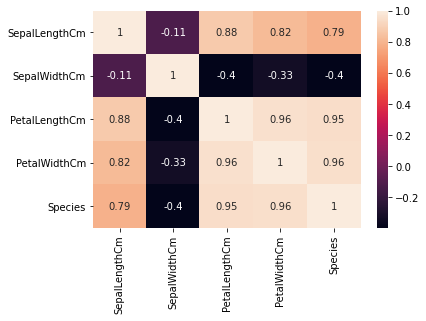

In [21]:
sns.heatmap(d.iloc[:,1:].corr(),annot=True)
plt.show()

# Using Train Test split

In [22]:
X_train = d.iloc[:,1:-1].values

In [23]:
Y_train = d.iloc[:,-1].values

In [24]:
XX_train,x_test,yy_train,y_test = train_test_split(X_train,Y_train,test_size=0.40,random_state=42)

# Creating Decision Tree Algorithm

In [25]:
dtree = DecisionTreeClassifier(max_depth=3,random_state=1)

In [26]:
dtree.fit(XX_train,yy_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [27]:
sum(dtree.predict(x_test)==y_test)/len(y_test)

0.9661016949152542

[Text(133.92000000000002, 190.26, 'PetalWidthCm <= 0.75\ngini = 0.655\nsamples = 87\nvalue = [22, 35, 30]\nclass = Iris-versicolor'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]\nclass = Iris-setosa'),
 Text(200.88000000000002, 135.9, 'PetalWidthCm <= 1.75\ngini = 0.497\nsamples = 65\nvalue = [0, 35, 30]\nclass = Iris-versicolor'),
 Text(133.92000000000002, 81.53999999999999, 'PetalLengthCm <= 5.05\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]\nclass = Iris-versicolor'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginca'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = Iris-virginca')]

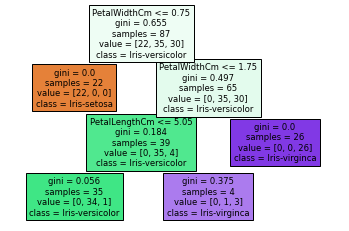

In [28]:
plot_tree(dtree,feature_names=d.columns[1:-1],class_names=['Iris-setosa','Iris-versicolor','Iris-virginca'],
         filled=True)

## Showing the feature importance 

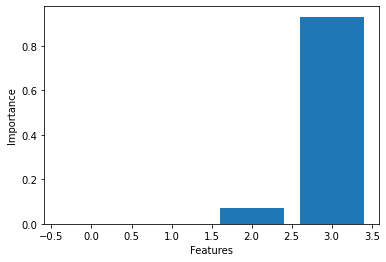

In [36]:
plt.bar(x=[0,1,2,3],height=dtree.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [35]:
dtree.feature_importances_

array([0.        , 0.        , 0.06975406, 0.93024594])